<a href="https://colab.research.google.com/github/SyarifulMsth/Brazillian-E-Commerce-Data-Analysis/blob/main/Notebook/Brazilian_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Project : Brazilian E-Commerce

## Business Understanding

Data analyst project on Brazilian E-Commerce Public Dataset

### Problem Statement

Rumusan masalah  (*problem statements*) pada proyek ini di antaranya sebagai berikut :
1. Bagaimana segmentasi pelanggan berdasarkan wilayah?
2. Bagaimana segmentasi penjual berdasarkan wilayah?
3. Bagaimana performa pelayanan berdasarkan status pengiriman pesanan?
4. Bagaimana tingkat kepuasan pelanggan?
5. Apakah terdapat tren dalam metode pembayaran yang digunakan oleh pelanggan?
6. RFM Analysis?


### Goals

Berdasarkan rumusan masalah (*problems statement*) yang telah dirumuskan sebelumnya, maka berikut adalah tujuan (*goals*) dari proyek ini :
1. Mengetahui bagaimana segmentasi pelanggan berdasarkan wilayah
2. Mengetahui bagaimana segmentasi penjual berdasarkan wilayah
3. Mengetahui bagaimana performa pelayanan berdasarkan status pengiriman pesanan
4. Mengetahui bagaimana tingkat kepuasan pelanggan
5. Mengetahui apakah terdapat tren dalam metode pembayaran yang digunakan oleh pelanggan
6. Mengetahui penerapan dan hasil dari RFM Analysis

### Solution Statements

Berdasarkan *problem statements* dan *goals* yang telah disebutkan sebelumnya, maka berikut adalah *solution statements* pada proyek ini :
1.   Melakukan tahapan *data wrangling* yang meliputi *gathering data*, *data assesing*, dam *data cleansing*.
2. Melakukan Exploratory Data Analysis untuk mendapatkan *insight* yang berguna dari data.

## Data Understanding

Pada project ini *dataset* yang digunakan adalah [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) yang terdiri dari 9 tabel data, di antaranya yaitu :

- olist_customers_dataset.csv
- olist_geolocation_dataset.csv
- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv
- olist_orders_dataset.csv
- olist_products_dataset.csv
- olist_sellers_dataset.csv
- product_category_name_translation.csv

Berikut adalah detail dari tiap tabel data di atas :

- Tabel customers: tabel ini menyimpan berbagai informasi terkait customer, meliputi customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.
- Tabel geolocation : tabel ini menyimpan berbagai informasi terkait zip code dan lat/lng coordinates, meliputi geolocation_zip_code_prefix, geolocation_lat, geolocation_lng,geolocation_city, dan geolocation_state.
- Tabel order items : tabel ini menyimpan berbagai informasi terkait barang/product yang dibeli untuk setiap pesanan, meliputi order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, dan freight_value.
- Tabel order payments : tabel ini menyimpan berbagai informasi terkait opsi pembayaran pesanan, meliputi order_id, payment_sequential, payment_type, payment_installments, dan payment_value.
- Tabel order reviews : tabel ini menyimpan berbagai informasi terkait ulasan (*review*) yang dibuat oleh pelanggan, yang meliputi review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp.
- Tabel orders : tabel ini menyimpan berbagai informasi terkait setiap pesanan (*order*), yang meliputi order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.
- Tabel products : tabel ini menyimpan berbagai informasi terkait produk yang dijual, yang meliputi product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_length_cm, dan product_width_cm.
- Tabel sellers : tabel ini menyimpan berbagai informasi terkait penjual yang memenuhi pesanan, yang meliputi seller_id, seller_zip_code_prefix, seller_city, dan seller_state.
- Tabel product category name translation : tabel ini menyimpan berbagai informasi untuk menerjemahkan nama kategori produk ke bahasa Inggris.


## Import Necessary Libraries


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Gathering Data

Dataset Source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [ ]:
# Connect Google Colaboratory with Kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json


In [ ]:
! kaggle datasets download olistbr/brazilian-ecommerce

brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip brazilian-ecommerce.zip  -d /content/data/

Archive:  brazilian-ecommerce.zip
replace /content/data/olist_customers_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Customers Dataset

In [ ]:
customers_df = pd.read_csv("/content/data/olist_customers_dataset.csv")

### Geolocation Dataset

In [ ]:
geolocation_df = pd.read_csv("/content/data/olist_geolocation_dataset.csv")

### Order Items Dataset

In [ ]:
order_items_df = pd.read_csv("/content/data/olist_order_items_dataset.csv")

### Order Payments Dataset

In [ ]:
order_payments_df = pd.read_csv("/content/data/olist_order_payments_dataset.csv")

### Order Reviews Dataset

In [ ]:
order_reviews_df = pd.read_csv("/content/data/olist_order_reviews_dataset.csv")

### Orders Dataset

In [ ]:
orders_df = pd.read_csv("/content/data/olist_orders_dataset.csv")

### Product Dataset

In [ ]:
products_df = pd.read_csv("/content/data/olist_products_dataset.csv")

### Sellers Dataset

In [ ]:
sellers_df = pd.read_csv("/content/data/olist_sellers_dataset.csv")

### Product Category Name Translation Dataset

In [ ]:
product_category_df = pd.read_csv("/content/data/product_category_name_translation.csv")

## Data Assesing

### Customers Dataset

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers_df.shape

(99441, 5)

In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# memeriksa apakah ada missing value
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", customers_df.duplicated().sum())

Jumlah duplikasi data :  0


### Geolocation Dataset

In [ ]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation_df.shape

(1000163, 5)

In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# memeriksa apakah ada missing value
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", geolocation_df.duplicated().sum())

Jumlah duplikasi data :  261831


Pada *output* di atas diperoleh hasil bahwa terdapat *duplicated data* pada Geolocation Dataset, dan perlu dilakukan pembersihan data.

### Order Items Dataset

In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.shape

(112650, 7)

In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada *output* di atas, terdapat kesalahan tipe data pada *column* *shipping_limit_date*, sehingga perlu dilakukan perbaikan.

In [ ]:
# memeriksa apakah ada missing value
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", order_items_df.duplicated().sum())

Jumlah duplikasi data :  0


### Order Payments Dataset

In [ ]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments_df.shape

(103886, 5)

In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# memeriksa apakah ada missing value
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", order_payments_df.duplicated().sum())

Jumlah duplikasi data :  0


### Order Reviews Dataset

In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews_df.shape

(99224, 7)

In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Berdasarkan *output* di atas, terdapat beberapa kesalahan tipe data pada *column* *review_creation_date* dan *review_answer_timestamp*. Sehingga perlu dilakukan perbaiki tipe data.

In [ ]:
# memeriksa apakah ada missing value
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Berdasarkan *output* di atas, terdapat beberapa *missing value* pada dataset, sehingga perlu dilakukan pembersihan data.

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", order_reviews_df.duplicated().sum())

Jumlah duplikasi data :  0


### Order Dataset

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_df.shape

(99441, 8)

In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan *output* di atas, terdapat kesalahan tipe data pada *column* order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Sehingga perlu dilakukan perbaikan.

In [ ]:
# memeriksa apakah ada missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Pada *output* di atas, terdapat beberapa *missing value* pada dataset. Sehingga perlu dilakukan pembersihan data.

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", orders_df.duplicated().sum())

Jumlah duplikasi data :  0


### Product Dataset

In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.shape

(32951, 9)

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# memeriksa apakah ada missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Berdasarkan *output* di atas, terdapat beberapa *missing value* pada dataset. Sehingga perlu dilakukan pembersihan data.

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", products_df.duplicated().sum())

Jumlah duplikasi data :  0


### Sellers Dataset

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers_df.shape

(3095, 4)

In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# memeriksa apakah ada missing value
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", sellers_df.duplicated().sum())

Jumlah duplikasi data :  0


### Product Category Name Translation Dataset

In [ ]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
product_category_df.shape

(71, 2)

In [ ]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# memeriksa apakah ada missing value
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
# memeriksa duplicated data
print("Jumlah duplikasi data : ", product_category_df.duplicated().sum())

Jumlah duplikasi data :  0


## Data Cleansing


Berdasarkan tahapan *data assesing* yang telah dilakukan sebelumnya, diperoleh beberapa informasi pada dataset yang digunakan pada project ini :   
- Terdapat duplikasi data pada **Geolocation Dataset**
- Terdapat kesalahan tipe data pada **Order Items Dataset, Order Reviews Dataset, dan Orders Dataset.**
- Terdapat *missing value* pada **Order Reviews Dataset, Orders Dataset, dan Products Dataset.**

### *Handling missing value*

#### Order Reviews Dataset

In [ ]:
# Order Reviews Dataset
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
# menampilkan baris data yang mengandung missing value pada kolom review_comment_title
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
# menampilkan baris data yang mengandung missing value pada kolom review_comment_message
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


Berdasarkan hasil *output* di atas, apabila diperhatikan pada data tersebut masih mengandung banyak informasi penting, sehingga sayang jika langsung dibuang (*dropping*). Oleh karena itu, pada kasus ini solusi yang akan digunakan untuk menangani *missing value* tersebut yaitu menggunakan metode *imputation*.

Berikut implementasi metode *imputation* pada kasus ini, yaitu dengan mengganti *value* menjadi "No Comment" pada pengguna yang tidak memberikan komentar apapun (data yang hilang).  

In [ ]:
order_reviews_df["review_comment_title"].fillna("No Comment", inplace=True)
order_reviews_df["review_comment_message"].fillna("No Comment", inplace=True)

In [ ]:
# menampilkan hasil dari metode imputation
order_reviews_df[["review_comment_title", "review_comment_message"]].head(10)

,review_comment_title,review_comment_message
0,No Comment,No Comment
1,No Comment,No Comment
2,No Comment,No Comment
3,No Comment,Recebi bem antes do prazo estipulado.
4,No Comment,Parabéns lojas lannister adorei comprar pela I...
5,No Comment,No Comment
6,No Comment,No Comment
7,No Comment,No Comment
8,No Comment,No Comment
9,recomendo,aparelho eficiente. no site a marca do aparelh...


#### Order Dataset

In [ ]:
orders_df.shape

(99441, 8)

In [ ]:
# Order Dataset
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [ ]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Salah satu solusi permasalahan missing value adalah melakukan *dropping*, namun pada studi kasus dan dataset ini melakukan *dropping* dapat menyebabkan kehilangan informasi penting lain. Sehingga, pada dataset ini tidak dilakukan metode tersebut.


#### Product Dataset

In [ ]:
products_df.shape

(32951, 9)

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Salah satu solusi permasalahan missing value adalah melakukan *dropping*, namun pada studi kasus dan dataset ini melakukan *dropping* dapat menyebabkan kehilangan informasi penting lain. Sehingga, pada dataset ini tidak dilakukan metode tersebut.

### Menangani kesalahan tipe data

#### Order Items Dataset

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada Order Items Dataset di atas, *column shipping_limit_date* bertipe data *object*, yang mana seharusnya *column shipping_limit_date* bertipe data *datetime*. Sehingga perlu diubah tipe datanya.  

In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Order Reviews Dataset

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Pada Order Items Dataset di atas, *column review_creation_date dan review_answer_timestamp* bertipe data *object*, yang mana seharusnya *column-column* tersebut bertipe data *datetime*. Sehingga perlu diubah tipe datanya.  

In [ ]:
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Order Dataset

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pada Order Items Dataset di atas, *column order_approved_at, order_purchase_timestamp, order_delivered_carrier_date, order_estimated_delivery_date, dan order_delivered_customer_date* bertipe data *object*, yang mana seharusnya *column-column* tersebut bertipe data *datetime*. Sehingga perlu diubah tipe datanya.  

In [ ]:
datetime_columns = [
    'order_approved_at',
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_estimated_delivery_date',
    'order_delivered_customer_date'
]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Menangani data duplikasi (*duplicated data*)

In [ ]:
# geolocation dataset
print("Jumlah duplikasi data (sebelum) : ", geolocation_df.duplicated().sum())

Jumlah duplikasi data (sebelum) :  261831


In [ ]:
geolocation_df.drop_duplicates(inplace=True)

In [ ]:
# geolocation dataset
print("Jumlah duplikasi data (setelah) : ", geolocation_df.duplicated().sum())

Jumlah duplikasi data (setelah) :  0


### Mengubah nama *column*

In [ ]:
# mengubah nama column geolocation_zip_code_prefix
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geolocation_df.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# mengubah nama column seller_zip_code_prefix
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers_df.rename(columns={'seller_zip_code_prefix': "zip_code_prefix"}, inplace=True)
sellers_df.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Exploratory Data Analysis (EDA)

#### Eksplorasi Customer Dataset

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasarkan rangkuman statistik di atas, diperoleh informasi jumlah pelanggan sebanyak 99441 orang dengan pelanggan terbanyak berasal dari kota **sao paulo**. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan berdasarkan wilayah.

Untuk mengetahui lebih detail bagaimana jumlah penyebaran wilayah pelanggan, dapat dilakukan analisis lebih mendalam.

In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

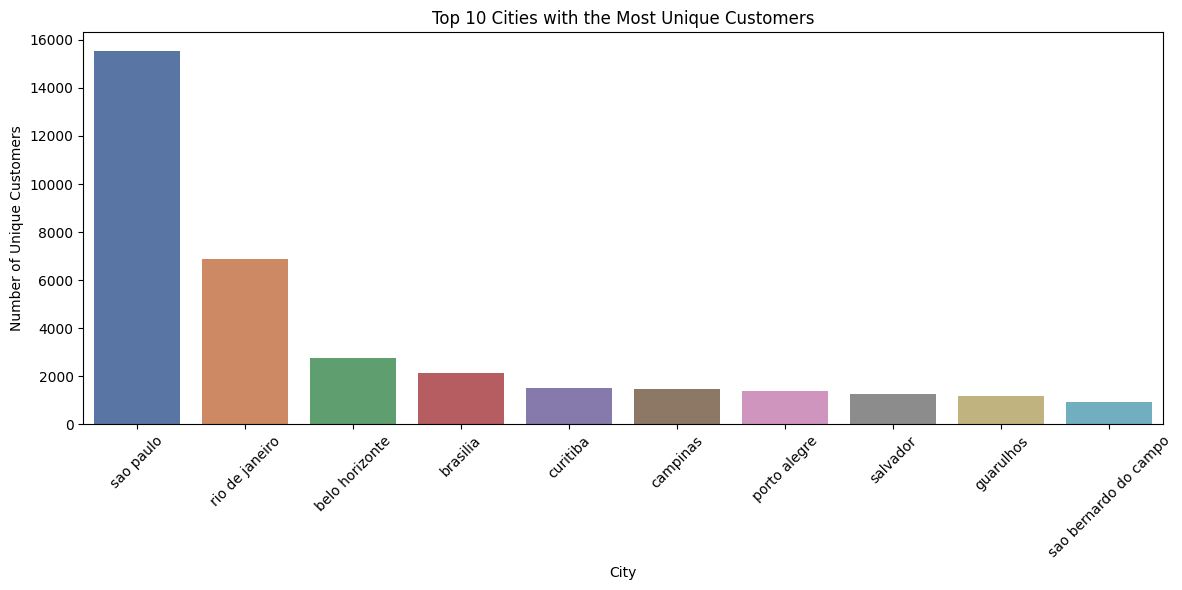

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
city_grouped = customers_df.groupby(by="customer_city").customer_id.nunique().reset_index().sort_values(by="customer_id", ascending=False)

# Mengambil 10 kota teratas
top_10_cities = city_grouped.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='customer_id', data=top_10_cities, palette='deep')
plt.xlabel('City')
plt.ylabel('Number of Unique Customers')
plt.title('Top 10 Cities with the Most Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

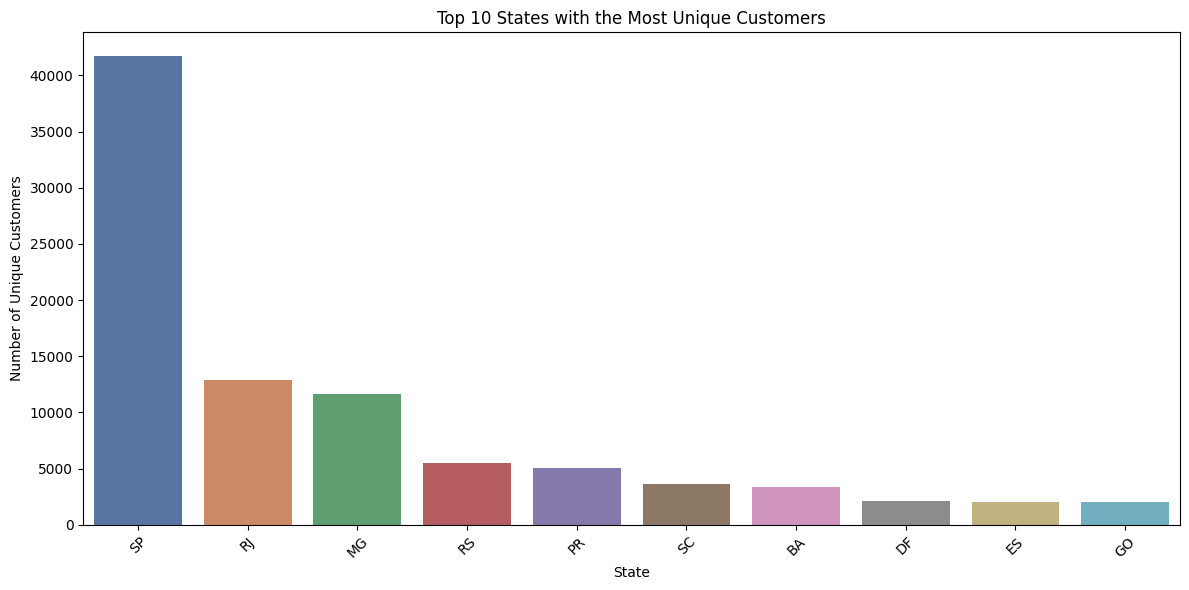

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
state_grouped = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index().sort_values(by="customer_id", ascending=False)

# Mengambil 10 state teratas
top_10_states = state_grouped.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='customer_id', data=top_10_states, palette='deep')
plt.xlabel('State')
plt.ylabel('Number of Unique Customers')
plt.title('Top 10 States with the Most Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Eksplorasi Geolocation Dataset

In [ ]:
geolocation_df.describe(include="all")

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


#### Eksplorasi Order Items Dataset

#### Eksplorasi Order Payments Dataset

In [ ]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Berdasarkan *output table* di atas, dapat diketahui bahwa :

- Pembayaran yang paling banyak digunakan oleh pelanggan yaitu menggunakan **credit card**.
- Pelanggan yang melakukan pembayaran memakai *credit card* rata-rata menggunakan uang mereka lebih banyak untuk berbelanja dibanding dengan metode pembayaran lain.

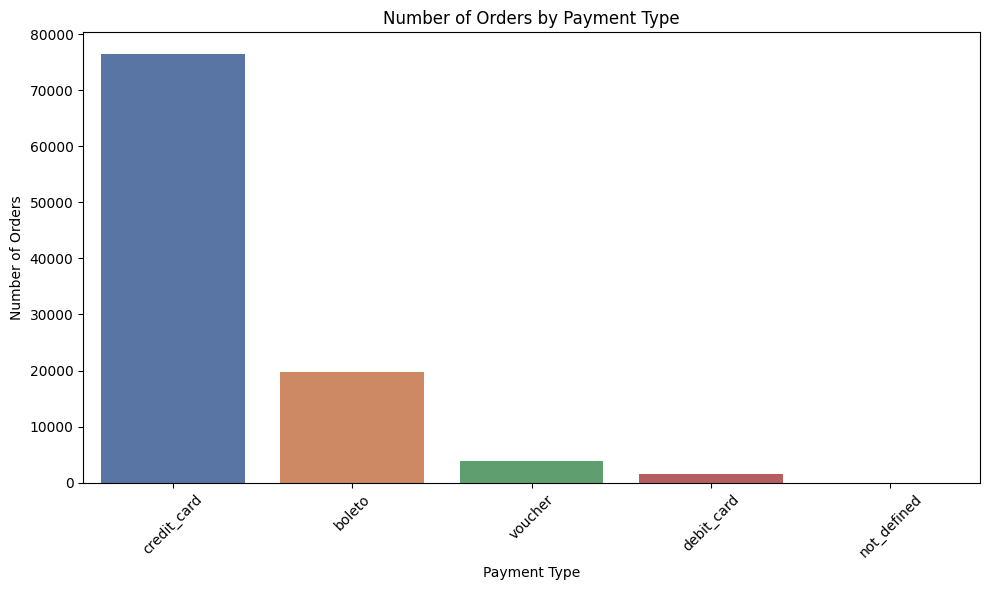

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
payment_type_grouped = order_payments_df.groupby("payment_type").order_id.nunique().reset_index().sort_values(by="order_id", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='order_id', data=payment_type_grouped, palette='deep')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Payment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Eksplorasi Order Reviews Dataset

#### Eksplorasi Order Dataset

In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [ ]:
orders_df.groupby("order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

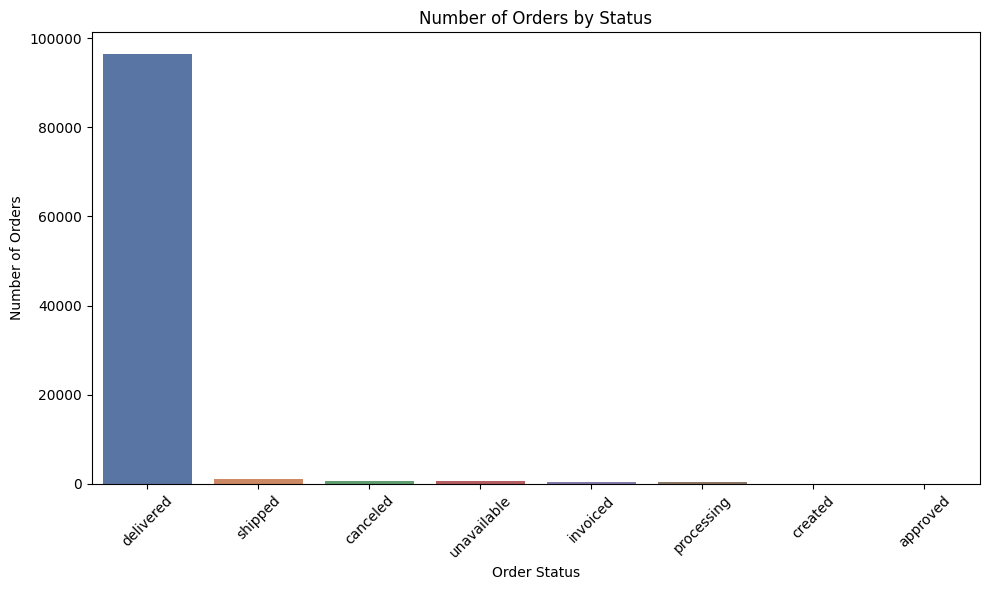

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
order_status_grouped = orders_df.groupby("order_status").order_id.nunique().reset_index()

# Sorting data
order_status_grouped = order_status_grouped.sort_values(by='order_id', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='order_status', y='order_id', data=order_status_grouped, palette='deep', order=order_status_grouped['order_status'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan *output* di atas, diperoleh informasi mengenai *order status* dari pesanan pelanggan.

#### Eksplorasi Product Dataset

In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

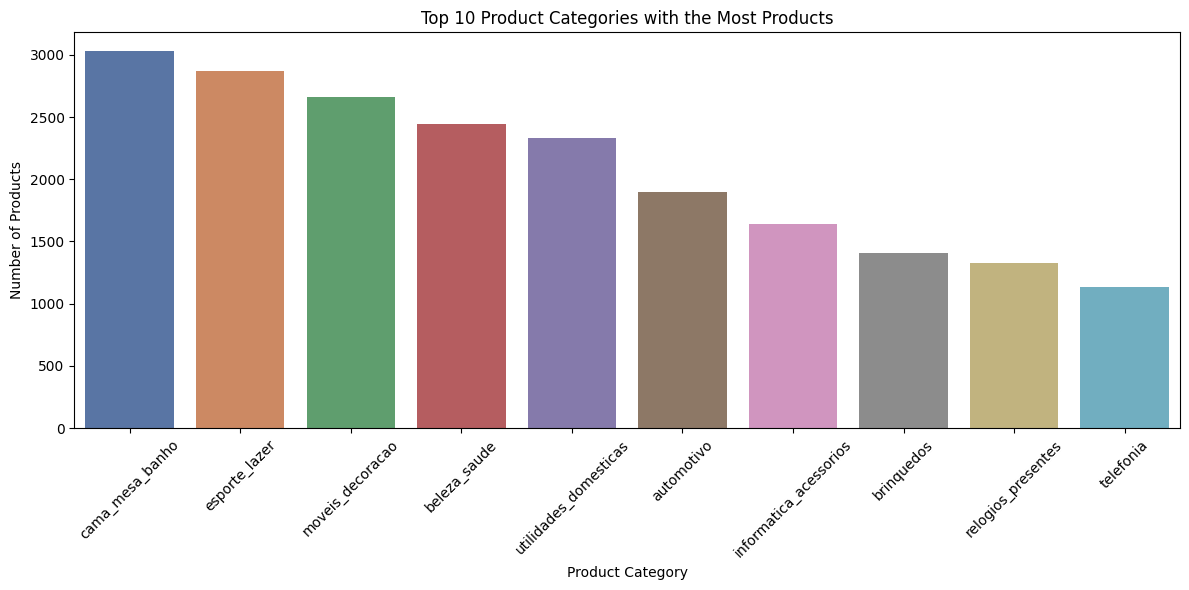

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
product_category_grouped = products_df.groupby("product_category_name").product_id.nunique().reset_index().sort_values(by="product_id", ascending=False)

# Mengambil 10 data teratas
top_10_product_categories = product_category_grouped.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name', y='product_id', data=top_10_product_categories, palette='deep')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Top 10 Product Categories with the Most Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Eksplorasi Sellers Dataset

In [ ]:
sellers_df.describe(include="all")

,seller_id,zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [ ]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [ ]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

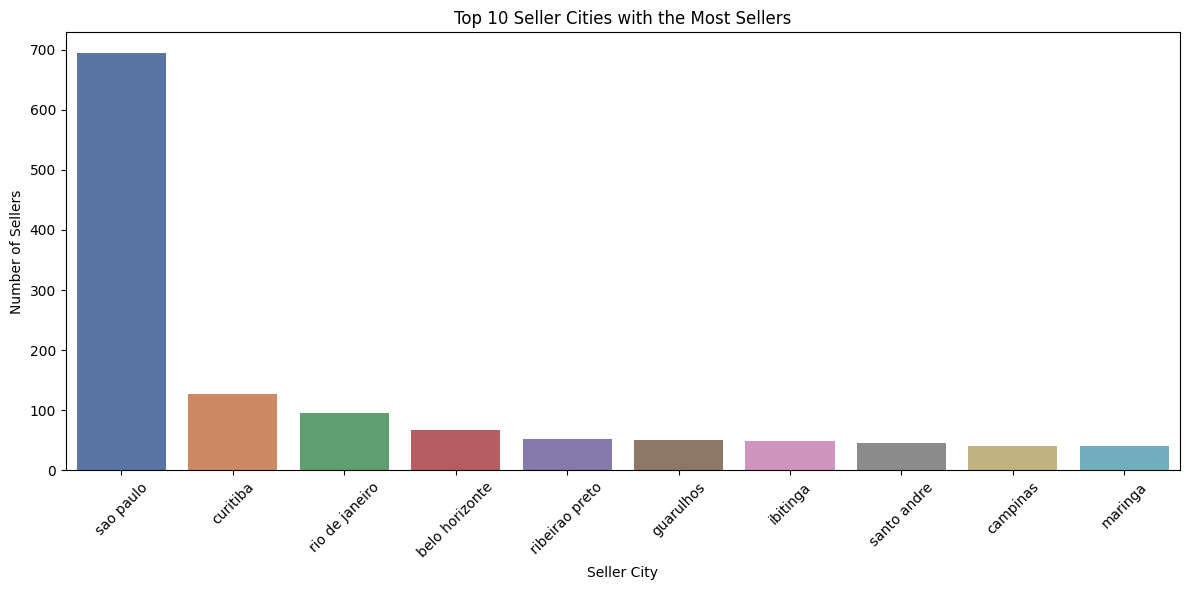

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
seller_city_grouped = sellers_df.groupby("seller_city").seller_id.nunique().reset_index().sort_values(by="seller_id", ascending=False)

# Mengambil 10 data teratas
top_10_seller_cities = seller_city_grouped.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='seller_city', y='seller_id', data=top_10_seller_cities, palette='deep')
plt.xlabel('Seller City')
plt.ylabel('Number of Sellers')
plt.title('Top 10 Seller Cities with the Most Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

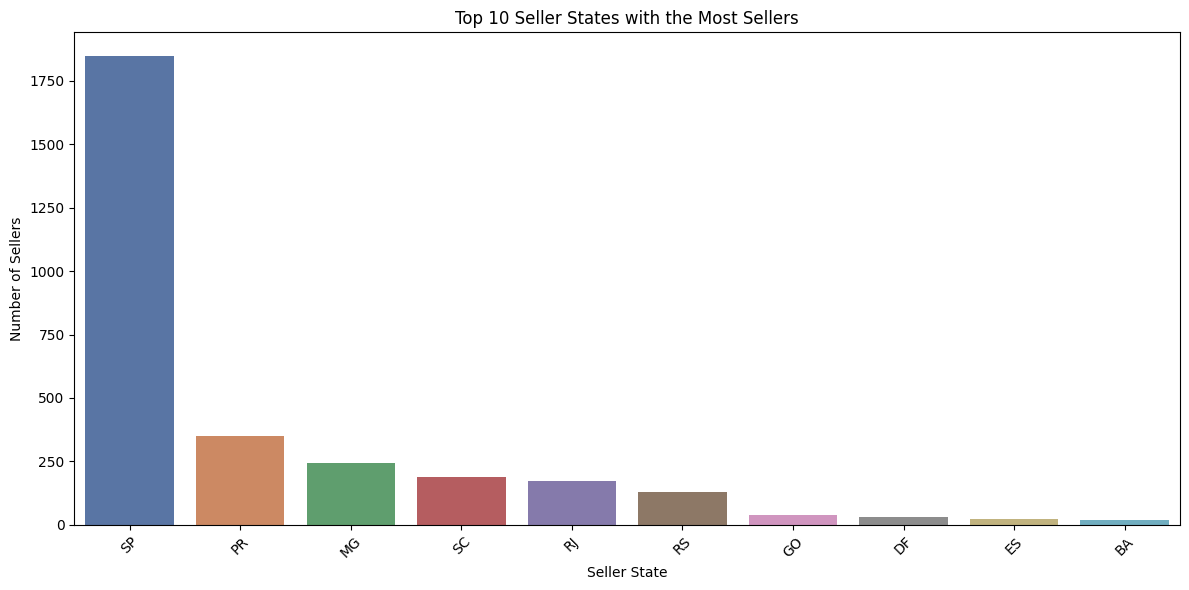

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
seller_state_grouped = sellers_df.groupby("seller_state").seller_id.nunique().reset_index().sort_values(by="seller_id", ascending=False)

# Mengambil 10 data teratas
top_10_seller_states = seller_state_grouped.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='seller_state', y='seller_id', data=top_10_seller_states, palette='deep')
plt.xlabel('Seller State')
plt.ylabel('Number of Sellers')
plt.title('Top 10 Seller States with the Most Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Eksplorasi Product Category Name Translation

In [ ]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menggabungkan semua dataset (*merge dataset*)

In [ ]:
# customer_df with orders_df
temp_df_1 = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [ ]:
# temp_df_1 with order_items_df
temp_df_2 = pd.merge(
    left=temp_df_1,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [ ]:
# order_payments_df with order_reviews_df
temp_df_3 = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [ ]:
# temp_df_2 with temp_df_3
temp_df_4 = pd.merge(
    left=temp_df_2,
    right=temp_df_3,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [ ]:
# product_category_df WITH products_df
temp_df_5 = pd.merge(
    left=product_category_df,
    right=products_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [ ]:
# temp_df_4 with temp_df_5
temp_df_6 = pd.merge(
    left=temp_df_4,
    right=temp_df_5,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [ ]:
# Final Dataset
all_df = pd.merge(
    left=temp_df_6,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [ ]:
all_df.to_csv("/content/All_Data_Brazilian_ECommerce.csv", index=False)

#### RFM Analysis

RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
})
rfm_df.columns = ["customer_id", "max_order_timestamp"]

# frequency
frequency = all_df.groupby('customer_id')['order_id'].count()

# monetary
monetary = all_df.groupby('customer_id')['price'].sum()

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
recency = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df = pd.DataFrame({
    'customer_id': recency.index,
    'recency': recency.values,
    'frequency': frequency.values,
    'monetary': monetary.values
})

rfm_df.head()

,customer_id,recency,frequency,monetary
0,0,337,1,89.80
1,1,458,1,54.90
2,2,596,1,179.99
3,3,427,1,149.90
4,4,198,1,93.00


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  int64  
 1   recency      99441 non-null  int64  
 2   frequency    99441 non-null  int64  
 3   monetary     99441 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 3.0 MB


In [ ]:
rfm_df.sort_values(by='recency',ascending=False)

,customer_id,recency,frequency,monetary
3354,3354,773,2,72.89
40289,40289,772,1,59.50
38013,38013,764,1,0.00
52277,52277,762,3,134.97
68946,68946,745,1,100.00
...,...,...,...,...
15595,15595,18,1,0.00
74611,74611,16,1,0.00
29531,29531,14,1,0.00
51713,51713,1,1,0.00


In [ ]:
rfm_df.sort_values(by='frequency',ascending=False)

,customer_id,recency,frequency,monetary
15183,15183,435,63,2305.38
7586,7586,389,38,3039.62
60184,60184,545,29,11383.95
56942,56942,497,26,1299.74
81894,81894,158,24,359.76
...,...,...,...,...
35433,35433,256,1,22.99
35432,35432,456,1,59.90
35431,35431,162,1,120.00
35429,35429,535,1,139.90


In [ ]:
rfm_df.sort_values(by='monetary',ascending=False)

,customer_id,recency,frequency,monetary
8546,8546,383,8,13440.00
60184,60184,545,29,11383.95
86603,86603,506,15,10856.10
38590,38590,245,24,9888.00
43009,43009,160,7,9520.14
...,...,...,...,...
70386,70386,272,1,0.00
33389,33389,216,1,0.00
70474,70474,432,1,0.00
33344,33344,164,1,0.00


### Visualization & Explanatory Analysis


1. Bagaimana segmentasi pelanggan berdasarkan wilayah?
2. Bagaimana segmentasi penjual berdasarkan wilayah?
3. Bagaimana kinerja dari status pesanan pelanggan?
4. Apakah terdapat tren dalam metode pembayaran yang digunakan oleh pelanggan?
5. Bagaimana kinerja atau tren dari pelayanan pengiriman?
6. Bagaimana tingkat kepuasan pelanggan?
7. RFM Analysis


#### Pertanyaan 1: Bagaimana segmentasi pelanggan berdasarkan wilayah?


In [ ]:
segmentation_customer_city_df = all_df.groupby(by="customer_city").agg({"customer_id": "nunique"}).sort_values(by="customer_id", ascending=False)
segmentation_customer_city_df = segmentation_customer_city_df.reset_index()
segmentation_customer_city_df.head()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


In [ ]:
segmentation_customer_state_df = all_df.groupby(by="customer_state").agg({"customer_id": "nunique"}).sort_values(by="customer_id", ascending=False)
segmentation_customer_state_df = segmentation_customer_state_df.reset_index()
segmentation_customer_state_df.head()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


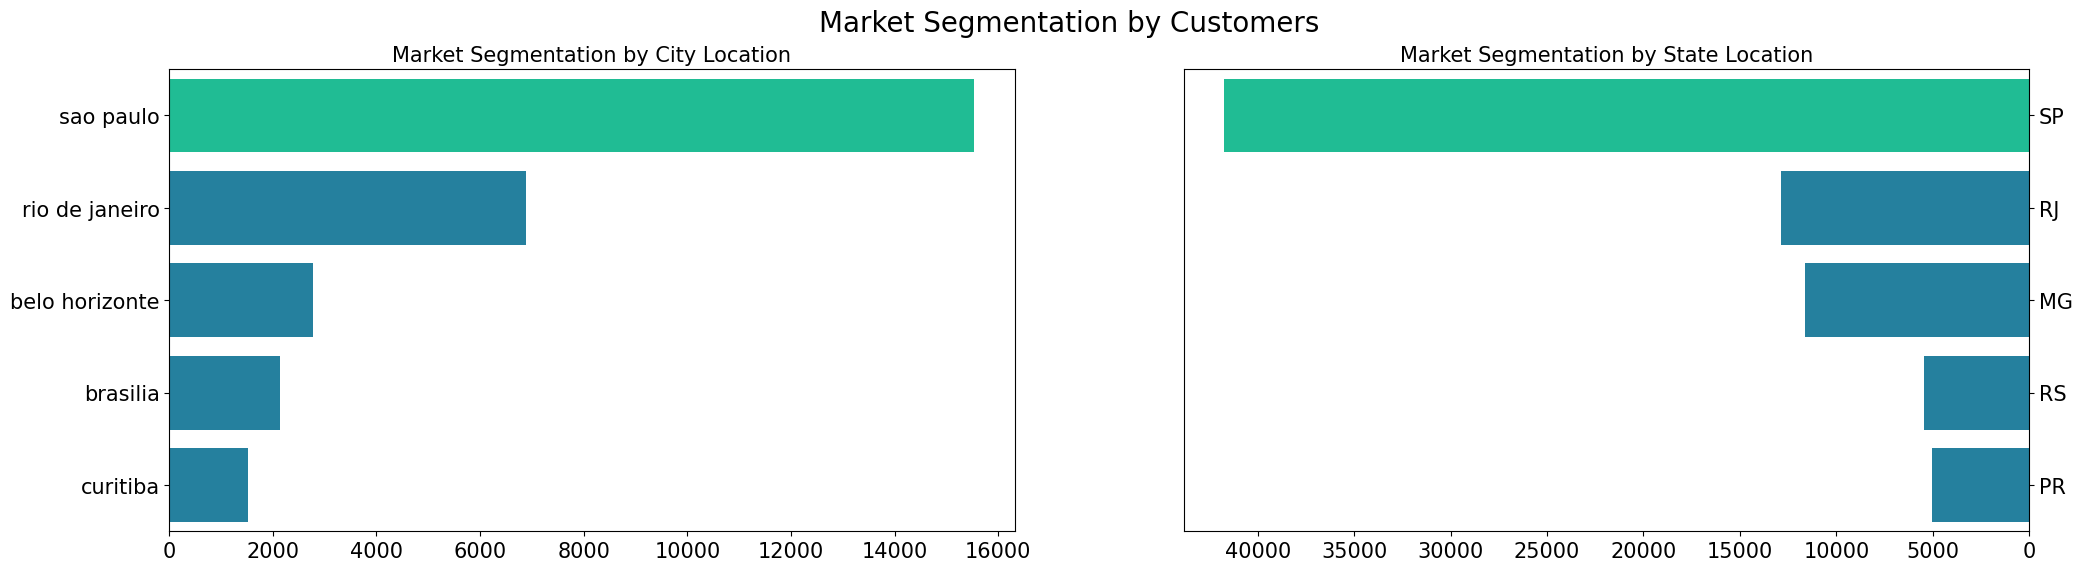

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
colors = ["#06D6A0", "#118AB2", "#118AB2", "#118AB2", "#118AB2"]

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plot for Market Segmentation by City Location
sns.barplot(x="customer_id", y="customer_city", data=segmentation_customer_city_df.sort_values(by="customer_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Market Segmentation by City Location", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

# Plot for Market Segmentation by State Location
sns.barplot(x="customer_id", y="customer_state", data=segmentation_customer_state_df.sort_values(by="customer_id", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Market Segmentation by State Location", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

# Set overall title
plt.suptitle("Market Segmentation by Customers", fontsize=20)

# Show plot
plt.show()

#### Pertanyaan 2: Bagaimana segmentasi penjual berdasarkan wilayah?


In [ ]:
segmentation_seller_city_df = all_df.groupby(by="seller_city").agg({"seller_id": "nunique"}).sort_values(by="seller_id", ascending=False)
segmentation_seller_city_df = segmentation_seller_city_df.reset_index()
segmentation_seller_city_df.head()

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52


In [ ]:
segmentation_seller_state_df = all_df.groupby(by="seller_state").agg({"seller_id": "nunique"}).sort_values(by="seller_id", ascending=False)
segmentation_seller_state_df = segmentation_seller_state_df.reset_index()
segmentation_seller_state_df.head()

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171


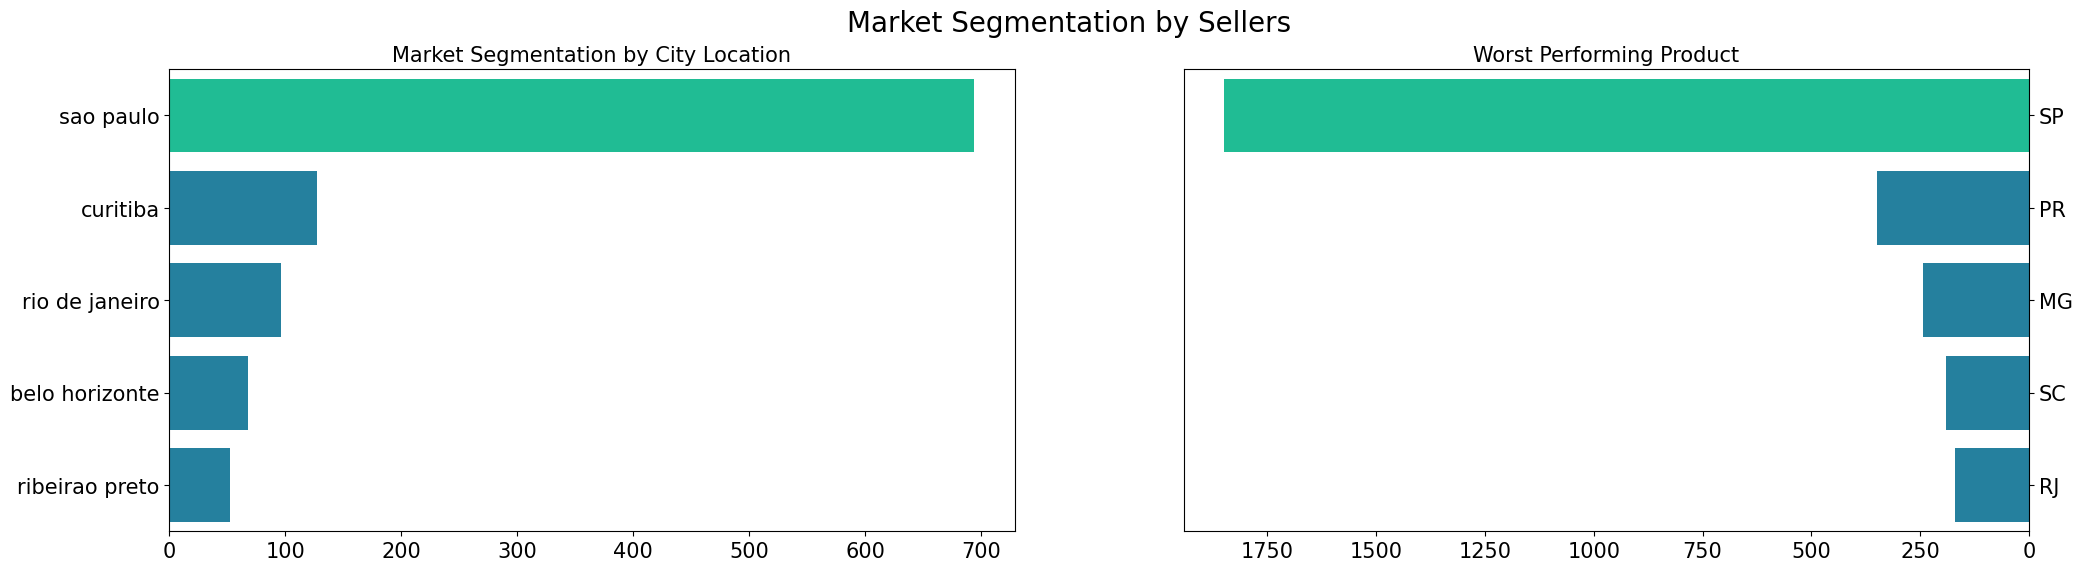

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="seller_id", y="seller_city", data=segmentation_seller_city_df.sort_values(by="seller_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Market Segmentation by City Location", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="seller_id", y="seller_state", data=segmentation_seller_state_df.sort_values(by="seller_id", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Market Segmentation by Sellers", fontsize=20)
plt.show()

#### Pertanyaan 3: Bagaimana performa atau kinerja status pesanan dari pelanggan?


In [ ]:
order_status_performance_df = all_df.groupby('order_status').agg({"order_id": "nunique"}).sort_values(by="order_id", ascending=False)
order_status_performance_df = order_status_performance_df.reset_index()
order_status_performance_df.head()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314


<ipython-input-287-047ae17c1891>:3: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


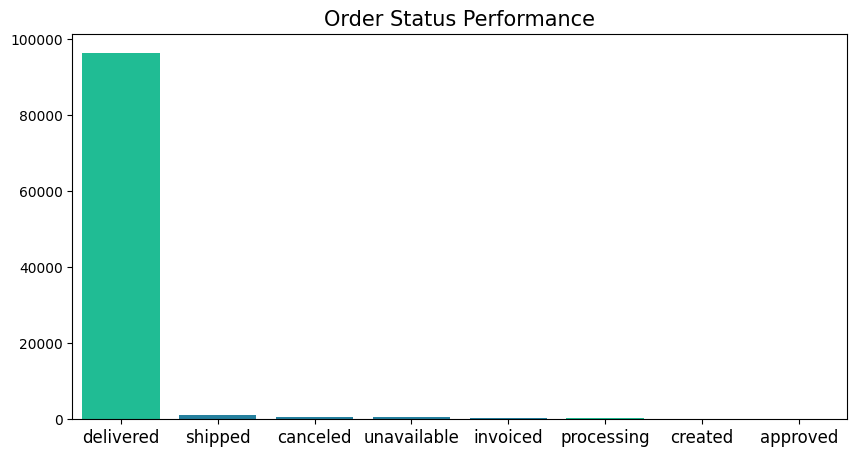

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="order_id",
    x="order_status",
    data=order_status_performance_df.sort_values(by="order_id", ascending=False),
    palette=colors
)
plt.title("Order Status Performance", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Pertanyaan 4: Apakah terdapat tren dalam metode pembayaran yang digunakan oleh pelanggan?


In [ ]:
order_payments_trens_df = all_df.groupby('payment_type').agg({"order_id": "nunique"}).sort_values(by="order_id", ascending=False)
order_payments_trens_df = order_payments_trens_df.reset_index()
order_payments_trens_df.head()

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


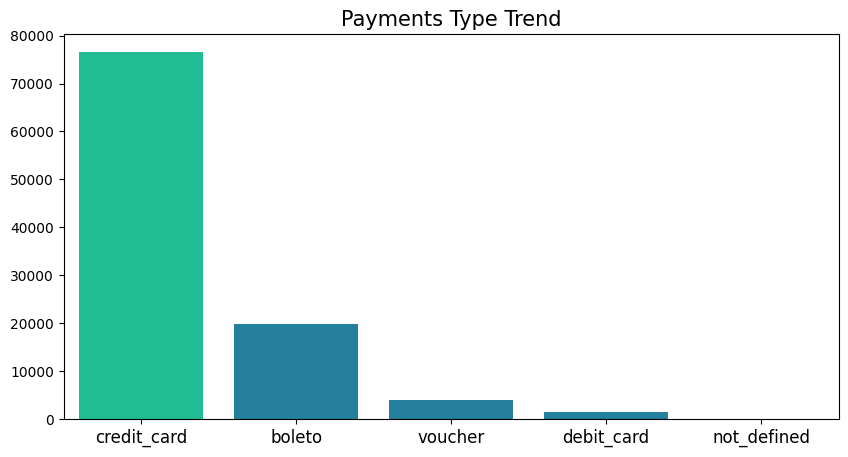

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="order_id",
    x="payment_type",
    data=order_payments_trens_df.sort_values(by="order_id", ascending=False),
    palette=colors
)
plt.title("Payments Type Trend", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Pertanyaan 5: Bagaimana tingkat kepuasan pelanggan?

In [ ]:
customers_rating_df = all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='customer_id')
customers_rating_df

,review_score,customer_id
4,5.0,66343
3,4.0,22319
0,1.0,15425
2,3.0,9894
1,2.0,4162


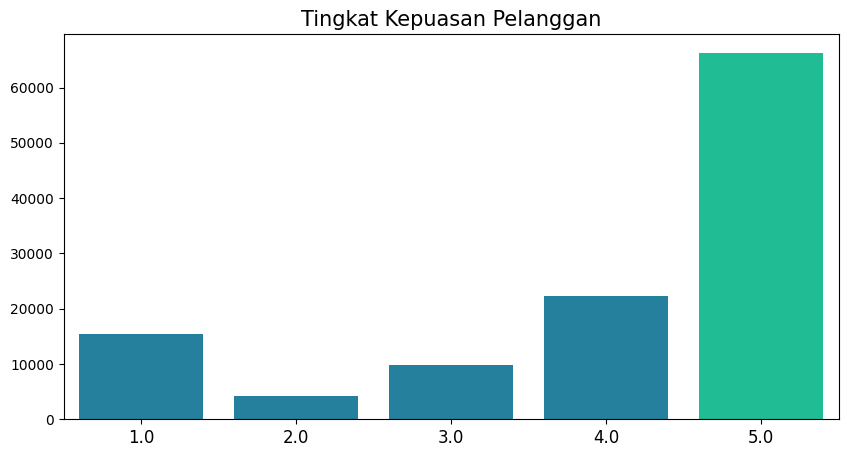

In [ ]:
plt.figure(figsize=(10, 5))

colors2 = ["#118AB2", "#118AB2", "#118AB2", "#118AB2", "#06D6A0"]

sns.barplot(
    y="customer_id",
    x="review_score",
    data=customers_rating_df.sort_values(by="customer_id", ascending=False),
    palette=colors2
)
plt.title("Tingkat Kepuasan Pelanggan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### RFM Analysis


In [ ]:
rfm_df

,customer_id,recency,frequency,monetary
0,0,337,1,89.80
1,1,458,1,54.90
2,2,596,1,179.99
3,3,427,1,149.90
4,4,198,1,93.00
...,...,...,...,...
99436,99436,202,3,164.70
99437,99437,148,1,47.90
99438,99438,126,1,199.90
99439,99439,410,2,21.80


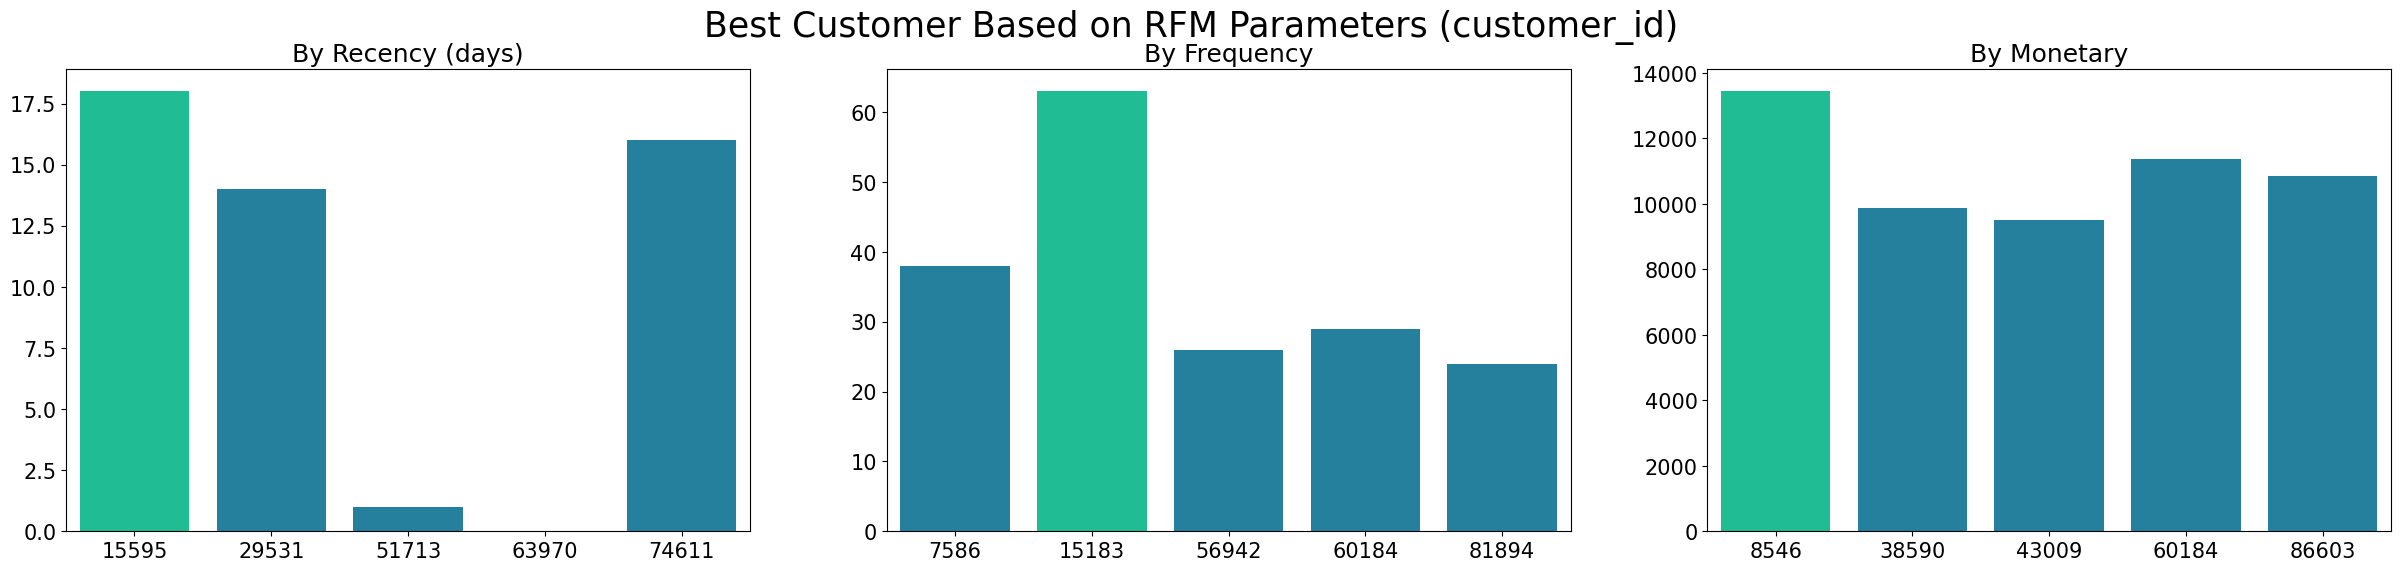

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

recency_colors = ["#06D6A0", "#118AB2", "#118AB2", "#118AB2", "#118AB2"]
frequency_colors = ["#118AB2", "#06D6A0", "#118AB2", "#118AB2", "#118AB2"]
monetary_colors = ["#06D6A0", "#118AB2", "#118AB2", "#118AB2", "#118AB2"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=recency_colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=frequency_colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=monetary_colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=25)
plt.show()

### Hasil dan Kesimpulan

#### Bagaimana segmentasi pelanggan berdasarkan wilayah?

Dari hasil visualisasi data, terlihat bahwa **Sao Paulo** memiliki jumlah pelanggan terbesar, diikuti oleh **Rio De Janeiro** dan **Belo Horizonte** berdasarkan kota tempat tinggal pelanggan. Sementara itu, jika kita melihat berdasarkan negara bagian (State), pelanggan terbanyak ada di **SP** (Sao Paulo), **RJ** (Rio de Janeiro), dan **MG**(Minas Gerais).

Informasi ini dapat memberikan wawasan berharga kepada para pemangku kepentingan (stakeholder) dalam proses pengambilan keputusan. Dengan melihat tingginya jumlah pelanggan di Sao Paulo, Rio de Janeiro, dan Belo Horizonte, stakeholder dapat menyadari bahwa wilayah-wilayah ini memiliki potensi besar untuk pengembangan bisnis atau peningkatan pelayanan. Hal ini bisa mencakup upaya seperti meningkatkan strategi promosi, pemasaran yang lebih intensif, atau menyediakan layanan khusus guna mengakomodasi permintaan yang signifikan di wilayah tersebut.

#### Bagaimana segmentasi penjual berdasarkan wilayah?

Dari hasil visualisasi data, terlihat bahwa **Sao Paulo** memiliki jumlah penjual terbesar, diikuti oleh **Curitiba** dan **Rio De Janeiro** berdasarkan kota tempat tinggal penjual. Sementara itu, jika kita melihat berdasarkan negara bagian (State), penjual terbanyak ada di **SP** (Sao Paulo), **PR** (Paraná), dan **MG**(Minas Gerais).

#### Bagaimana performa atau kinerja status pesanan dari pelanggan?

Berdasarkan informasi yang telah diperoleh, bahwa performa atau kinerja status pesanan dari pelanggan, sebanyak **96478** tercatat dalam status ***delivered***, **1107** dalam status ***shipped***, **625** dalam status ***canceled***, dan seterusnya. Hal tersebut dapat diartikan bahwa performa atau kinerja status pesanan dari pelanggan tergolong dalam kategori baik.

#### Apakah terdapat tren dalam metode pembayaran yang digunakan oleh pelanggan?

Berdasarkan data yang telah divisualisasikan, terdapat beberapa variasi dalam metode pembayaran yang digunakan oleh pelanggan, termasuk Boleto, Kartu Kredit, Kartu Debit, Voucher, dan metode "not_defined." Dari berbagai pilihan ini, metode pembayaran paling umum yang dipilih oleh pelanggan adalah **Kartu Kredit**, dan rata-rata nilai pembayaran yang dilakukan dengan metode ini lebih tinggi dibandingkan dengan metode pembayaran lainnya.

Informasi ini dapat menjadi dasar bagi pihak yang berkepentingan (stakeholder) untuk mengambil keputusan, seperti memberikan promosi atau diskon kepada pelanggan yang menggunakan Kartu Kredit sebagai metode pembayaran.

#### Bagaimana tingkat kepuasan pelanggan?

Berdasarkan data dan informasi yang telah diperoleh, diketahui bahwa:
-    66343 pelanggan memberikan 5 bintang review score
-    22319 pelanggan memberikan 4 bintang review score  
-    15425 pelanggan memberikan 3 bintang review score  
-    9894  pelanggan memberikan 2 bintang review score  
-    4162  pelanggan memberikan 1 bintang review score  


Dengan demikian, dapat disimpulkan bahwa sebagian besar pelanggan mengungkapkan kepuasan mereka dengan memberikan penilaian tinggi, terutama dengan pemberian 4 dan 5 bintang dalam review score.

#### RFM Analysis

Berdasarkan hasil RFM Analysis dan visualisasi data di atas, dapat diketahui beberapa pelanggan terbaik berdasarkan parameter Recency, Frequency dan Monetary.

---